# Importing library

In [10]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder

In [7]:
data=pd.read_csv("groceries.csv",sep="\t",header=None)
data.columns = ["Items"]
data

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [34]:
data.fillna(0,inplace=True)
data.head(10)

,citrus fruit,semi-finished bread,margarine,ready soups
0,tropical fruit,yogurt,coffee,0
1,whole milk,0,0,0
2,pip fruit,yogurt,cream cheese,meat spreads
3,other vegetables,whole milk,condensed milk,long life bakery product
4,rolls/buns,0,0,0
5,pot plants,0,0,0
6,whole milk,cereals,0,0
7,beef,0,0,0
8,frankfurter,rolls/buns,soda,0
9,chicken,tropical fruit,0,0


In [14]:
data=list(data['Items'].apply(lambda x:x.split(',')))
te=TransactionEncoder()
te_data=te.fit(data).transform(data)
data=pd.DataFrame (te_data,columns=te.columns_).astype(int)
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data=data.iloc[:,5:]
data

,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Trying to see which are the frequent items bought together by changing the support value:

In [17]:
#function to compute the frequent datset
def frequent_itemsets(support ,length):
    frequent_itemsets = apriori(data,min_support=support,max_len=length,use_colnames=True)
    return frequent_itemsets

In [18]:
#To plot the network graph 
def plotting_frequent_items(rules, x=20,y=20):
    fig, ax=plt.subplots(figsize=(x,y))
    graph=nx.from_pandas_edgelist(rules,source="antecedents",target='consequents')
    nx.draw(graph,with_labels=True)
    plt.show()

# Building the model

In [21]:
fi_1 = frequent_itemsets(0.05, 3)
fi_1.sort_values('support',ascending = False,inplace=True)
fi_1.sort_values

<bound method DataFrame.sort_values of      support                        itemsets
25  0.255516                    (whole milk)
14  0.193493              (other vegetables)
18  0.183935                    (rolls/buns)
22  0.174377                          (soda)
26  0.139502                        (yogurt)
1   0.110524                 (bottled water)
19  0.108998               (root vegetables)
23  0.104931                (tropical fruit)
21  0.098526                 (shopping bags)
20  0.093950                       (sausage)
15  0.088968                        (pastry)
5   0.082766                  (citrus fruit)
0   0.080529                  (bottled beer)
13  0.079817                    (newspapers)
4   0.077682                   (canned beer)
16  0.075648                     (pip fruit)
27  0.074835  (whole milk, other vegetables)
10  0.072293         (fruit/vegetable juice)
24  0.071683            (whipped/sour cream)
2   0.064870                   (brown bread)
8   0.063447    

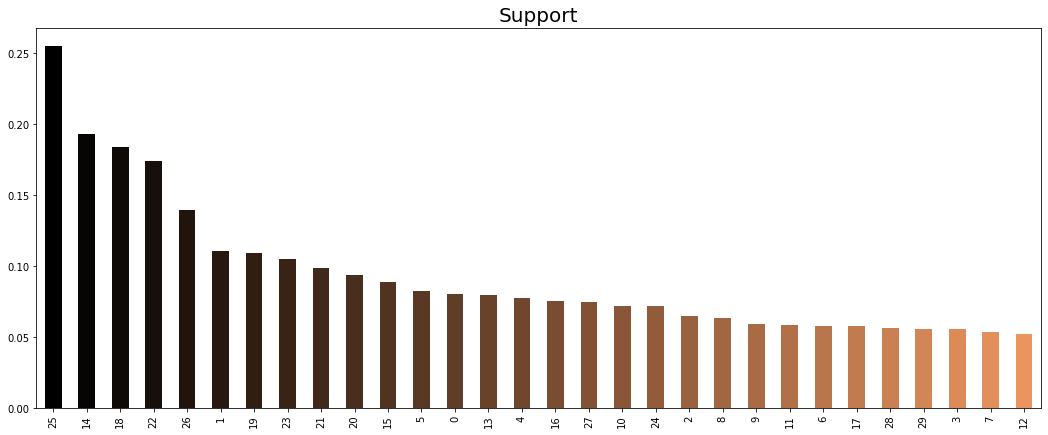

In [22]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
fi_1["support"].plot.bar(color = color)
plt.title('Support', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [23]:
rules = association_rules(fi_1, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


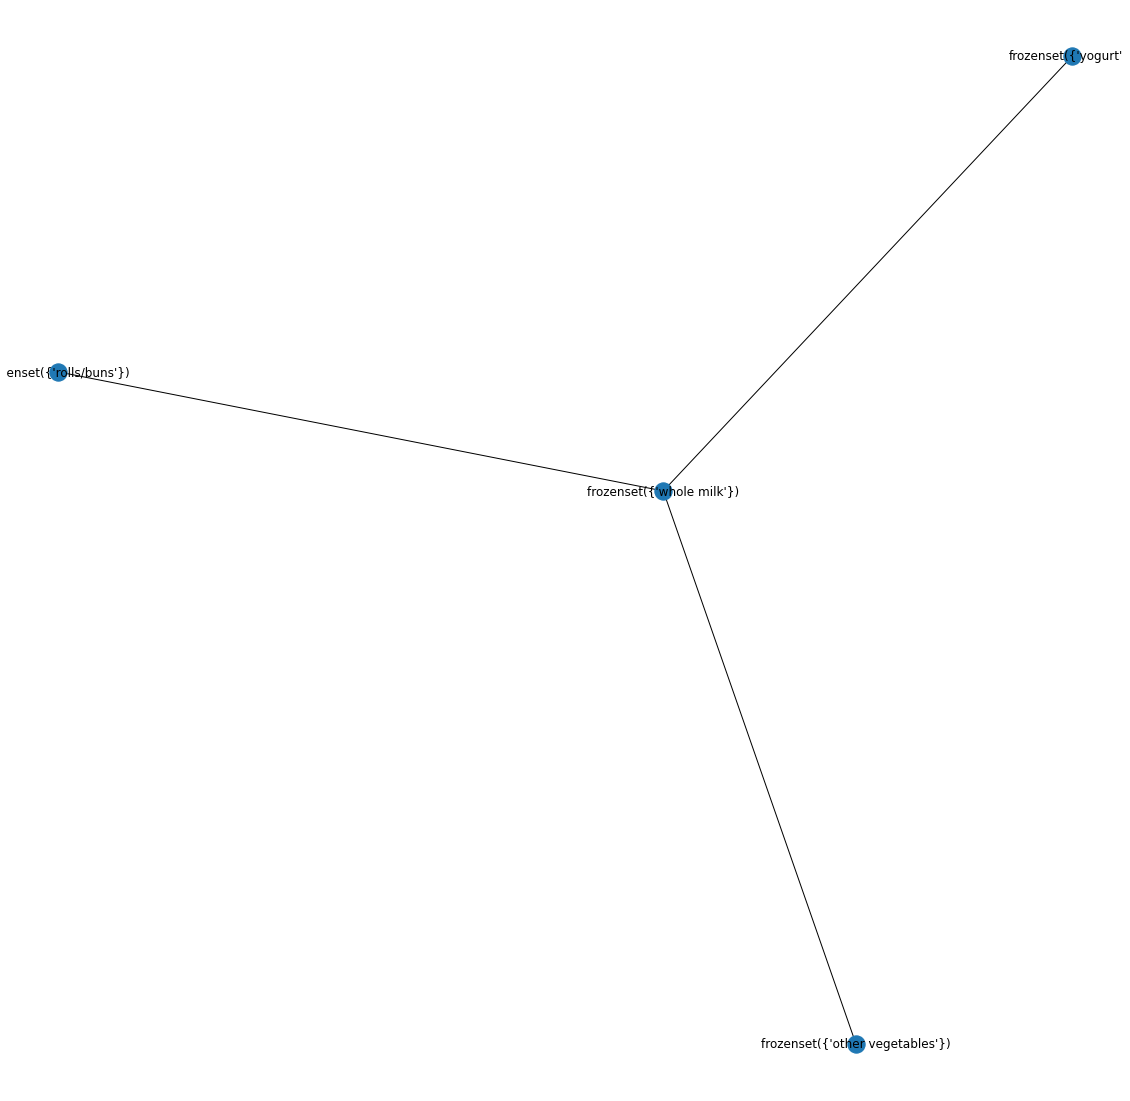

In [24]:
plotting_frequent_items(rules)

###### Observation: whole milk are bought the most and other vegitables are the second most selling in this store.

# Reducing the support value

In [27]:
fi_2 = frequent_itemsets(0.03, 3)
fi_2.sort_values('support',ascending = False,inplace=True)
fi_2.sort_values

<bound method DataFrame.sort_values of      support                    itemsets
40  0.255516                (whole milk)
24  0.193493          (other vegetables)
28  0.183935                (rolls/buns)
33  0.174377                      (soda)
41  0.139502                    (yogurt)
..       ...                         ...
23  0.031012                    (onions)
52  0.030605       (rolls/buns, sausage)
43  0.030503  (whole milk, citrus fruit)
34  0.030402       (specialty chocolate)
51  0.030097     (whole milk, pip fruit)

[61 rows x 2 columns]>

In [28]:
rules1=association_rules(fi_2,metric='lift',min_threshold=1)
rules1.sort_values('lift',ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
9,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
29,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344
28,(rolls/buns),(sausage),0.183935,0.093950,0.030605,0.166390,1.771048,0.013324,1.086899
19,(other vegetables),(tropical fruit),0.193493,0.104931,0.035892,0.185497,1.767790,0.015589,1.098913
18,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
27,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
26,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323
6,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
7,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401


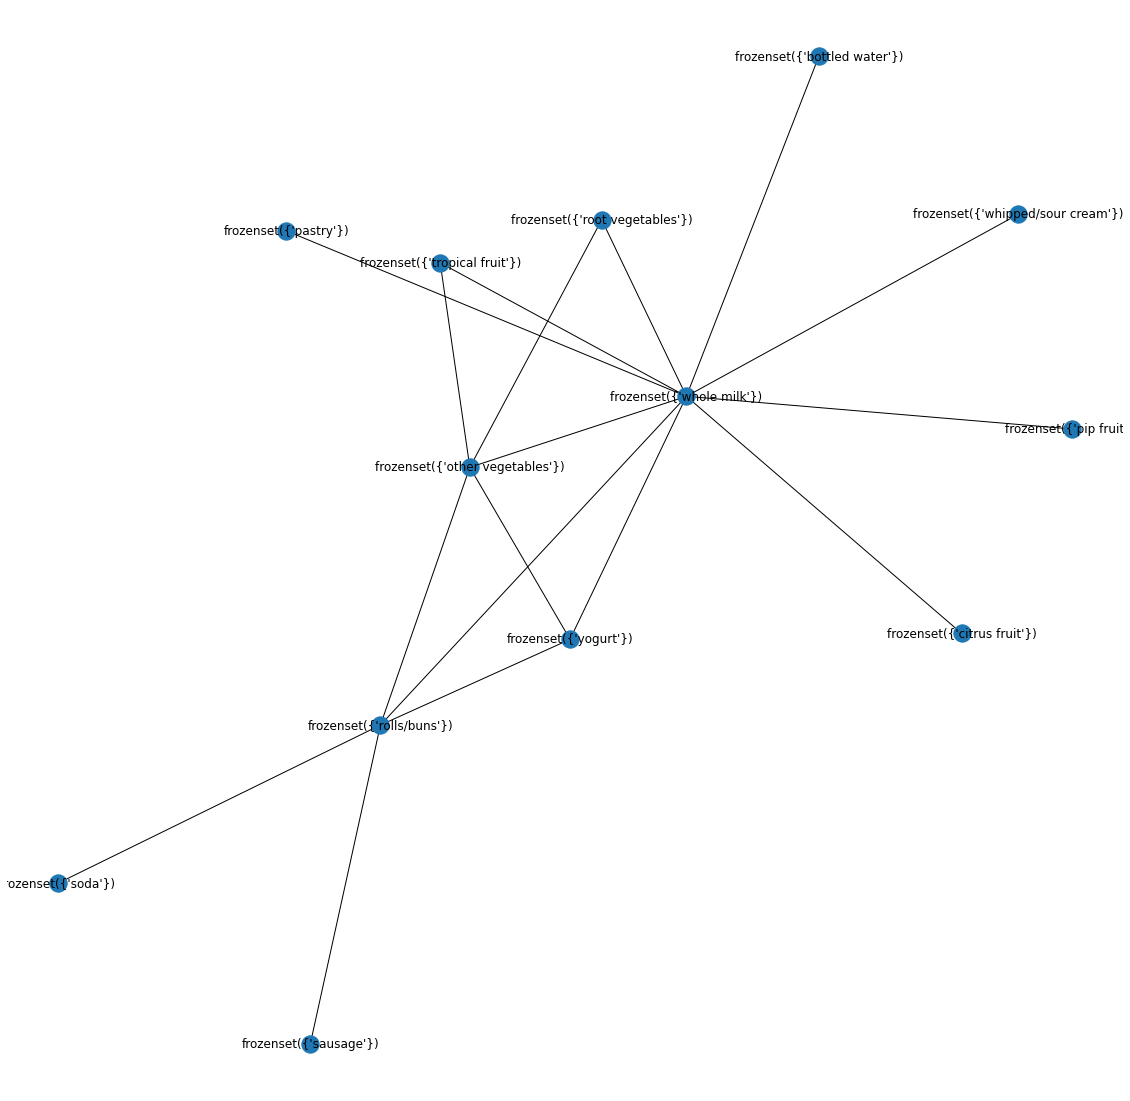

In [29]:
plotting_frequent_items(rules1)

###### we can see that when the support value is decreased the items increase and therefore we can see more items in the above plot

# Decreasing the minimum value as 2

In [30]:
fi_3 = frequent_itemsets(0.03, 2)
fi_3.sort_values('support',ascending = False,inplace=True)
fi_3.sort_values

<bound method DataFrame.sort_values of      support                    itemsets
40  0.255516                (whole milk)
24  0.193493          (other vegetables)
28  0.183935                (rolls/buns)
33  0.174377                      (soda)
41  0.139502                    (yogurt)
..       ...                         ...
23  0.031012                    (onions)
52  0.030605       (rolls/buns, sausage)
43  0.030503  (whole milk, citrus fruit)
34  0.030402       (specialty chocolate)
51  0.030097     (whole milk, pip fruit)

[61 rows x 2 columns]>

In [31]:
rules2=association_rules(fi_3,metric='lift',min_threshold=1)
rules2.sort_values('lift',ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
9,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
29,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344
28,(rolls/buns),(sausage),0.183935,0.093950,0.030605,0.166390,1.771048,0.013324,1.086899
19,(other vegetables),(tropical fruit),0.193493,0.104931,0.035892,0.185497,1.767790,0.015589,1.098913
18,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
27,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
26,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323
6,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
7,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401


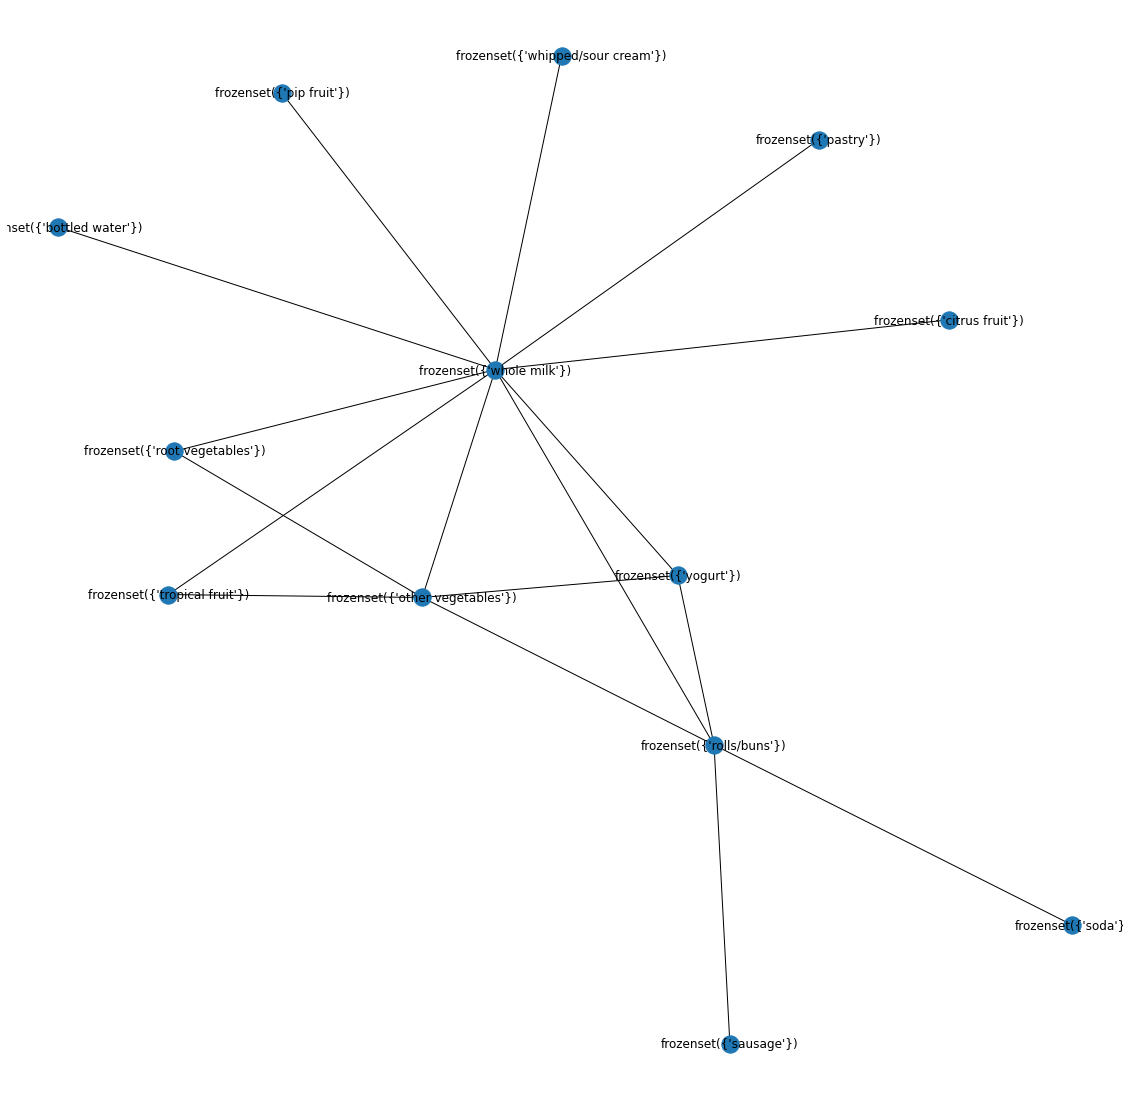

In [33]:
plotting_frequent_items(rules2)

# increase the confidence

In [34]:
fi_4 = frequent_itemsets(0.03, 2)
fi_4.sort_values('support',ascending = False,inplace=True)
fi_4.sort_values

<bound method DataFrame.sort_values of      support                    itemsets
40  0.255516                (whole milk)
24  0.193493          (other vegetables)
28  0.183935                (rolls/buns)
33  0.174377                      (soda)
41  0.139502                    (yogurt)
..       ...                         ...
23  0.031012                    (onions)
52  0.030605       (rolls/buns, sausage)
43  0.030503  (whole milk, citrus fruit)
34  0.030402       (specialty chocolate)
51  0.030097     (whole milk, pip fruit)

[61 rows x 2 columns]>

In [54]:
rules3=association_rules(fi_3,metric='confidence',min_threshold=0.4)
rules3.sort_values('lift',ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
4,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
1,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
3,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


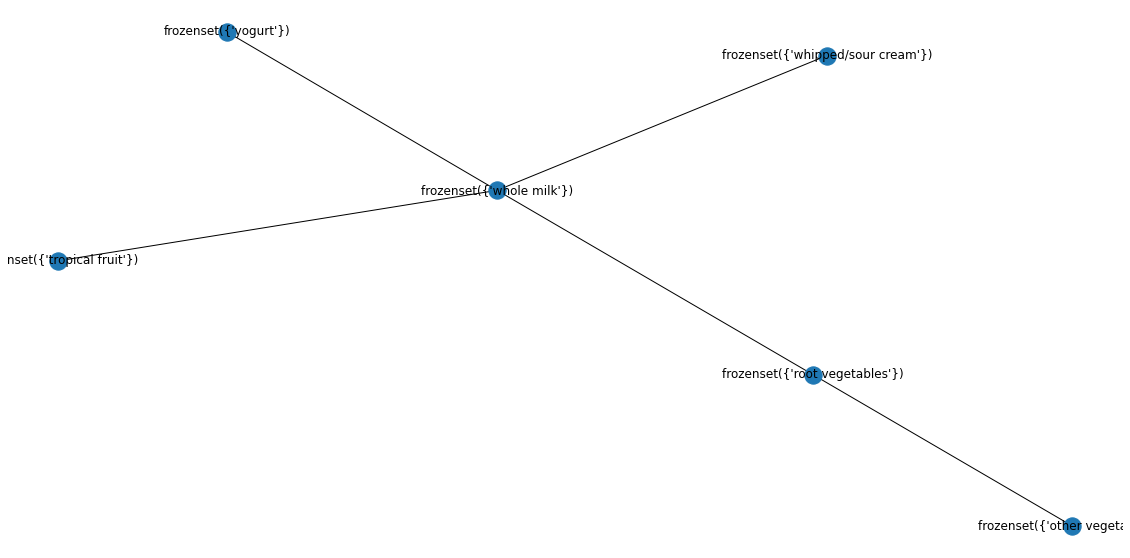

In [55]:
plotting_frequent_items(rules3,20,10)